In [30]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [9]:
# PRELIMINARY DATA EXPLORATION

In [5]:
data.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [6]:
data.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [8]:
data.shape

(1991, 3)

In [10]:
data.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [11]:
data.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [12]:
data.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [13]:
data['DATE'][1]


'2008-08-01 00:00:00'

In [14]:
type(data['DATE'][1])

str

In [17]:
data.DATE = pd.to_datetime(data.DATE)
data.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [18]:
# Let's pivot our dataframe
reshaped_data = data.pivot(index='DATE', columns='TAG', values='POSTS')


In [19]:
reshaped_data.shape

(145, 14)

In [20]:
reshaped_data.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [21]:
reshaped_data.head(6)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
2008-12-01,18.0,186.0,1597.0,633.0,134.0,NaN,832.0,627.0,134.0,481.0,441.0,1.0,161.0,NaN


In [23]:
reshaped_data.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [24]:
# DATA CLEANING 

# Let's fix the NAN values, 
# Let's subtituate any NAN value by 0
reshaped_data.fillna(0, inplace=True) 


In [25]:
reshaped_data.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [27]:
reshaped_data.isna().values.any()


False

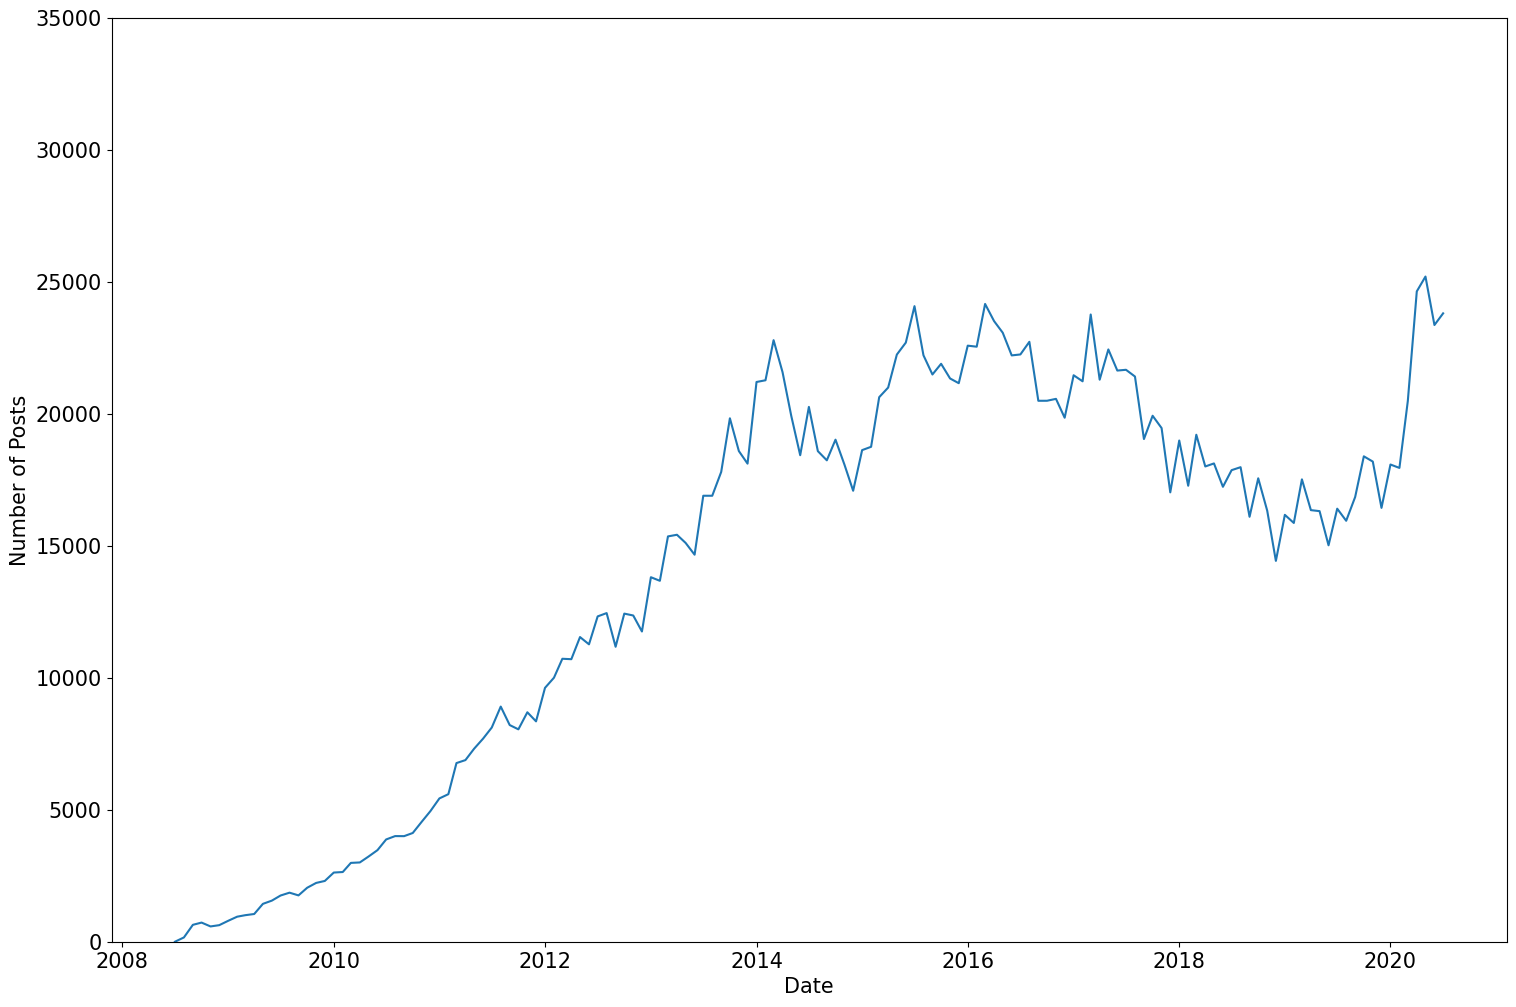

In [45]:
# Let's visualise our data by creating sevrals charts
# chart of popularity of the programming language c over the time
plt.figure(figsize=(18,12)) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Posts', fontsize=15)
plt.ylim(0, 35000)

plt.plot(reshaped_data.index, reshaped_data.javascript)


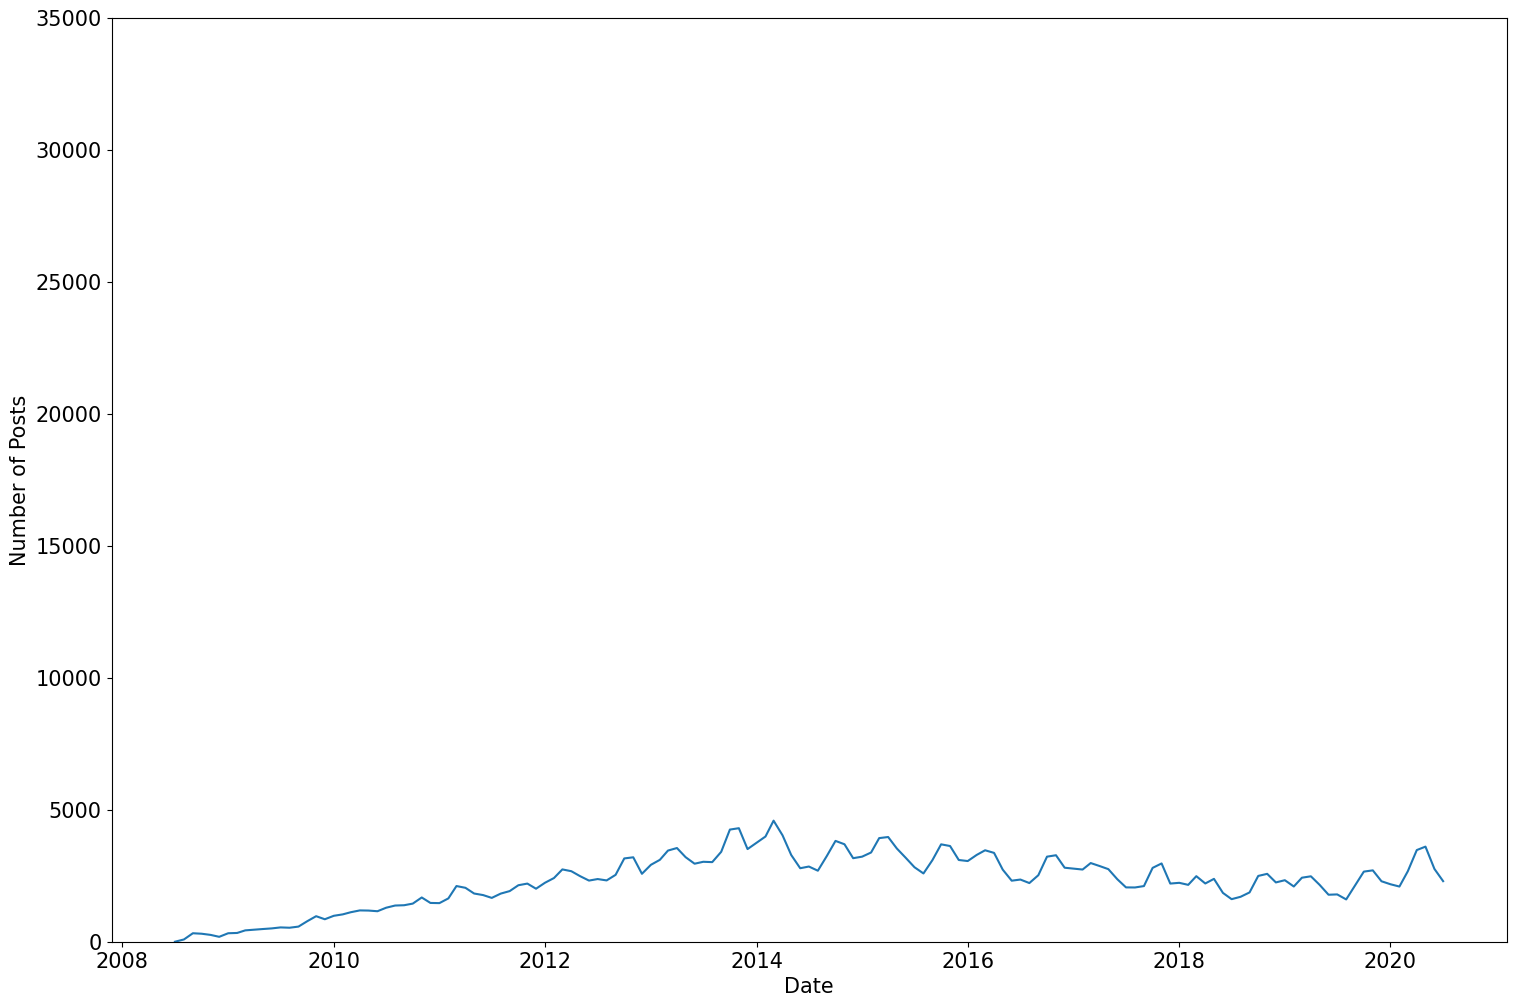

In [44]:
# chart of popularity of the programming language python over the time
plt.figure(figsize=(18,12)) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Posts', fontsize=15)
plt.ylim(0, 35000)

plt.plot(reshaped_data.index, reshaped_data.c)


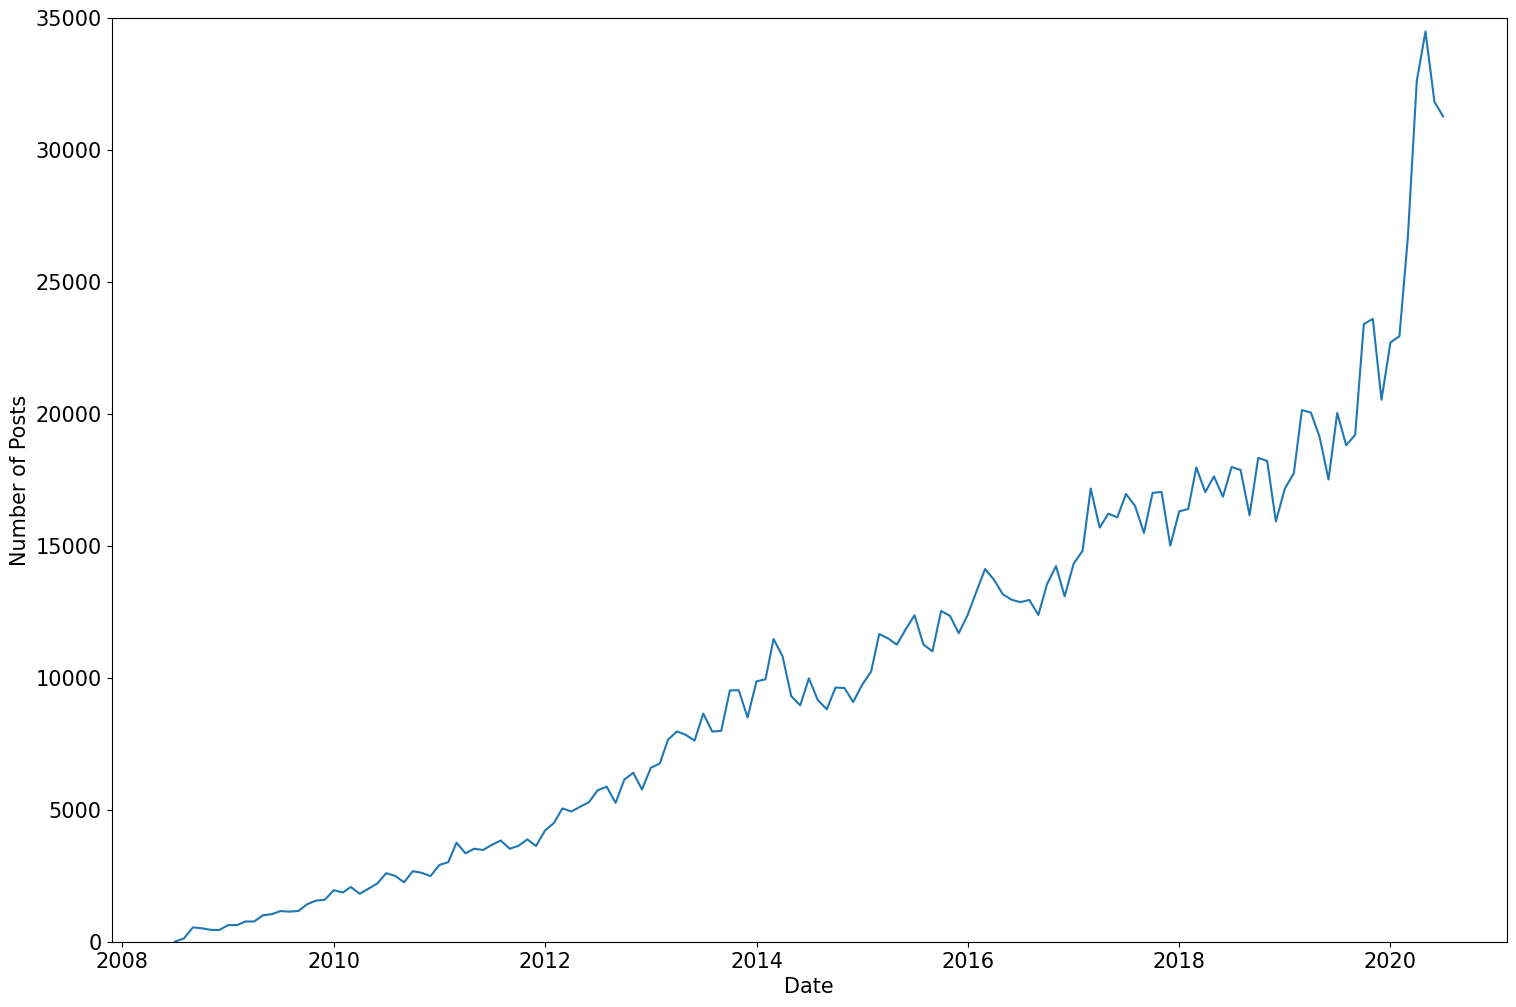

In [43]:
plt.figure(figsize=(18,12)) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Posts', fontsize=15)
plt.ylim(0, 35000)

plt.plot(reshaped_data.index, reshaped_data.python)

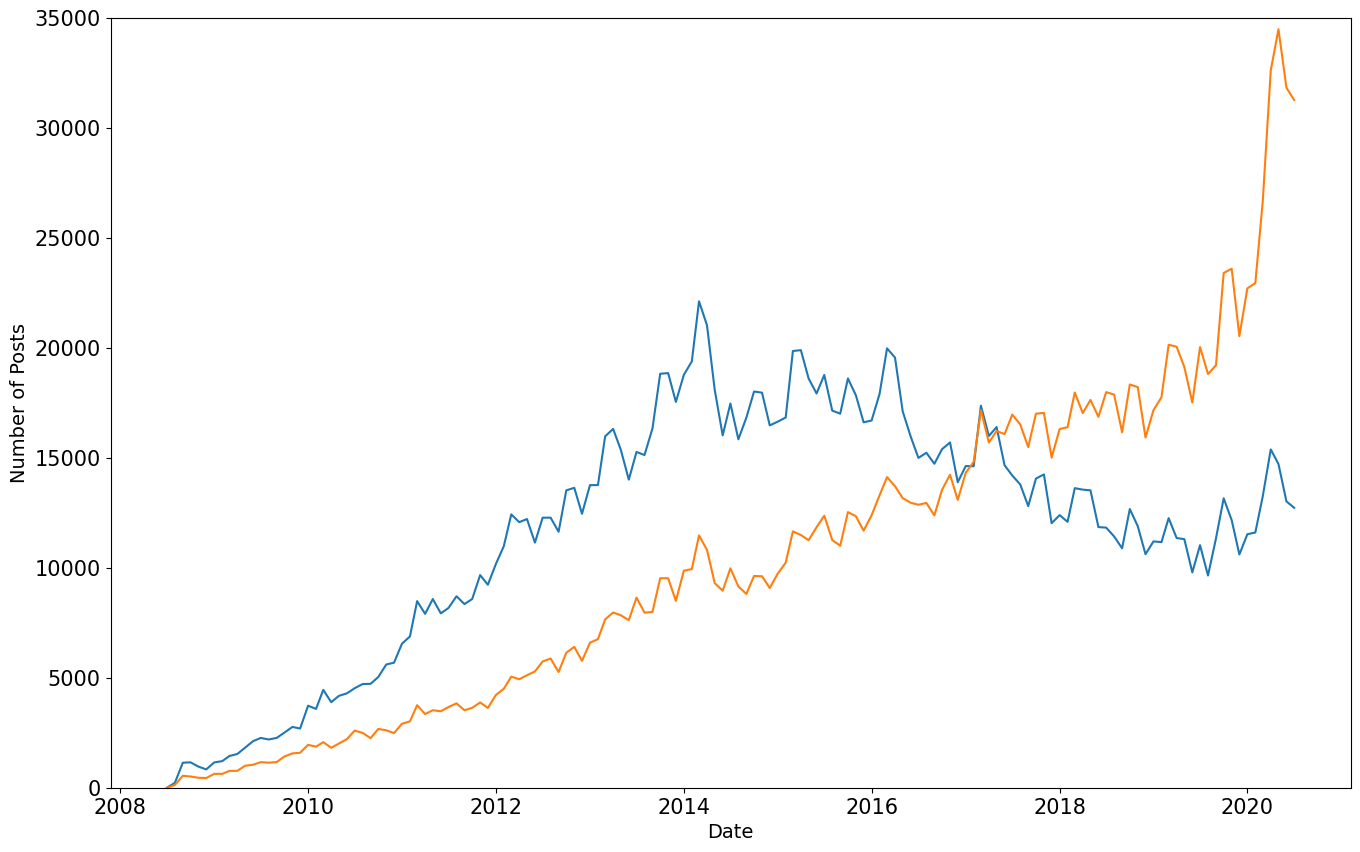

In [47]:
# Let's compare python and java
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
plt.plot(reshaped_data.index, reshaped_data.java)
plt.plot(reshaped_data.index, reshaped_data.python) 

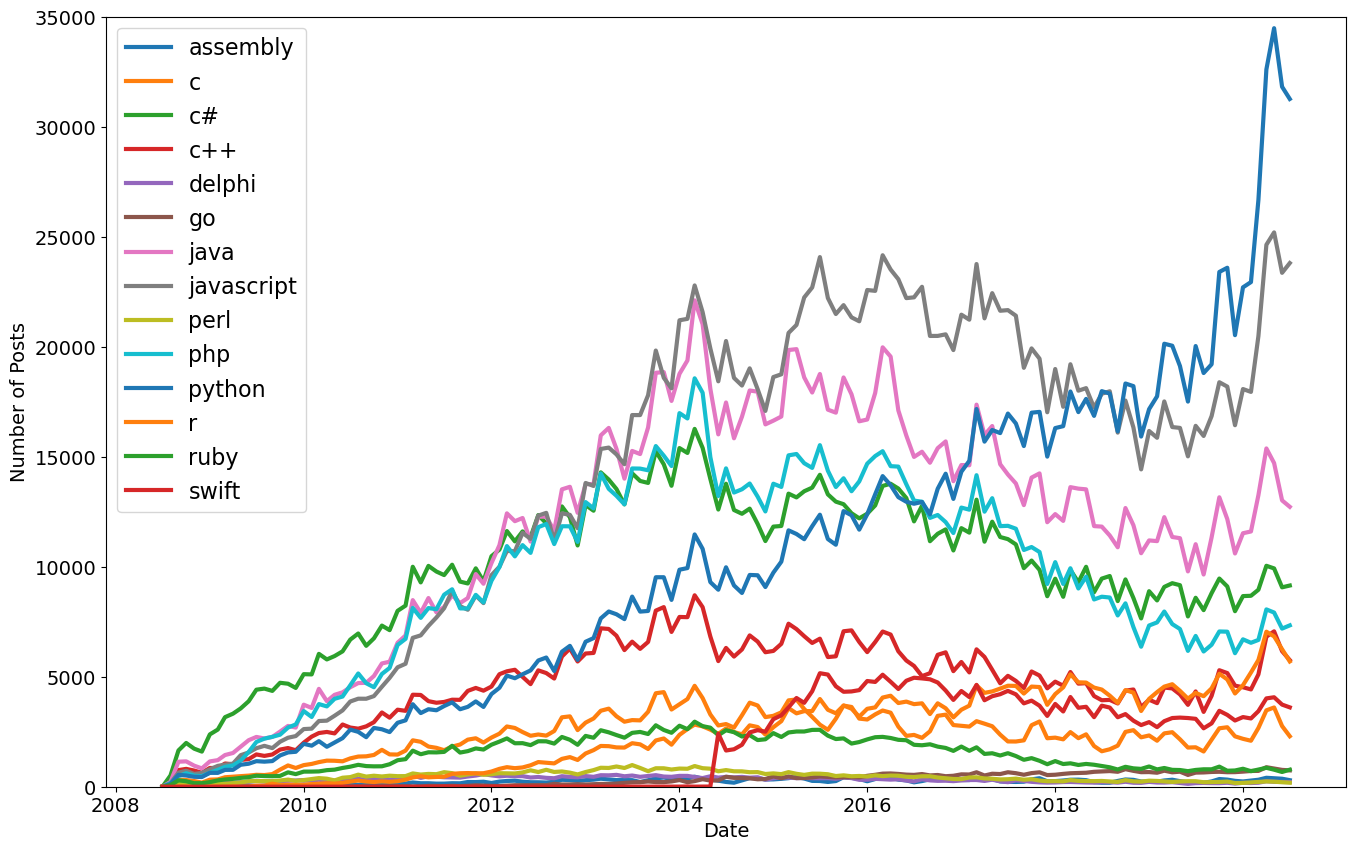

In [51]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_data.columns:
    plt.plot(reshaped_data.index, reshaped_data[column], 
             linewidth=3, label=reshaped_data[column].name)
 
plt.legend(fontsize=16) 

In [52]:
# According to our above chart, python is the some popular programming language

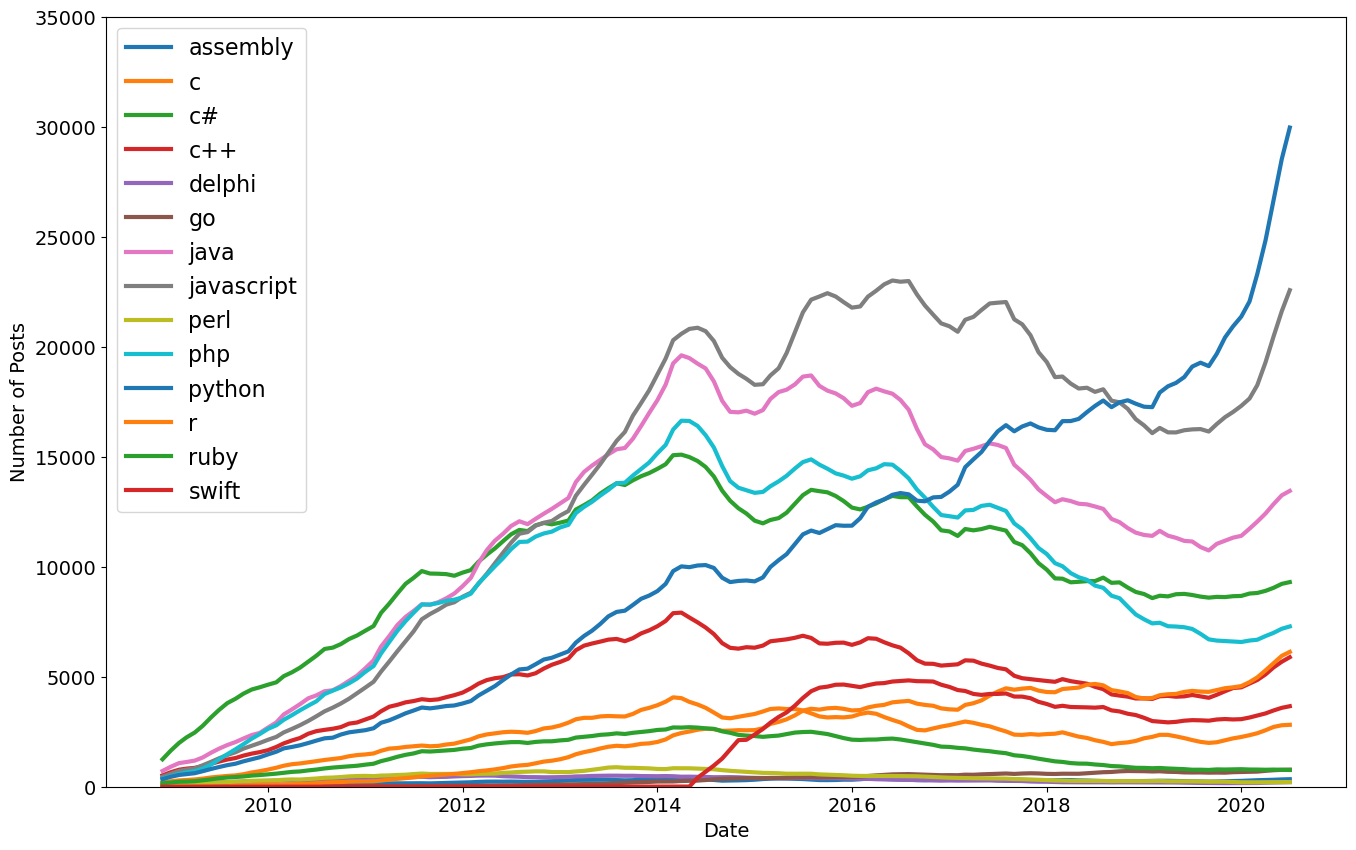

In [53]:
# to get a bether visualisation let's use the rolling mean method

roll_data = reshaped_data.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_data.columns:
    plt.plot(roll_data.index, roll_data[column], 
             linewidth=3, label=roll_data[column].name)
 
plt.legend(fontsize=16)

In [ ]:
# In 2020 python, javascript and java are the most popular programing languages.